# Machine Learning Project
# 1- Simple Linear Regression

# Step-1 Import dataset

In [136]:
# import libraries
import pandas as pd
df=pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


# Step-2 Splitting dataset into training data and testing data

In [137]:
X=df[["Height"]]
y=df["Weight"]

In [138]:
X.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [139]:
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [140]:
# import Library
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/5, random_state=0)

# Step-3 Fit Linear Regression Model

In [141]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Step-4 Plotting

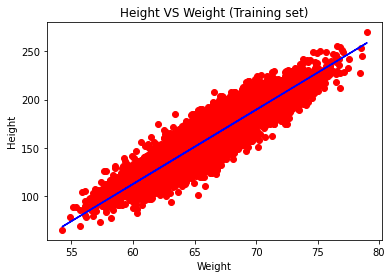

In [142]:
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, model.predict(X_train), color='blue')
plt.title('Height VS Weight (Training set)')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

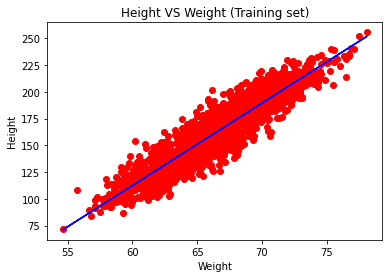

In [143]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, model.predict(X_test), color='blue')
plt.title('Height VS Weight (Training set)')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

# Step-5 Testing or Evaluating your model

In [144]:
# model fitness
print('score for training data=',model.score(X_test,y_test))

score for training data= 0.8581952493935256


In [145]:
print('score for testing data=',model.score(X_train,y_train))

score for testing data= 0.8544074009765417


# Step-6 Prediction of unknown values

In [146]:
model.predict([[74.110105]])

C:\Users\alias\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([221.15132133])

In [147]:
model.predict(X_test)

array([148.7894772 , 168.43520123, 224.31884497, ..., 159.17576427,
       155.86404539, 144.83449257])

In [148]:
reg=LinearRegression().fit(X_test,y_test)
print("test score=",reg.score(X_test,y_test))
print("train score=",reg.score(X_train,y_train))

test score= 0.8582279789831061
train score= 0.8543749349900249


# 2- Multiple Linear Regression

In [149]:
# Step-1 Import dataset

In [150]:
# import Libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [151]:
# import your data
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [152]:
x=df.drop(['charges','region','smoker','children','sex'],axis=1).values
y=df['charges'].values

In [153]:
x

array([[19.  , 27.9 ],
       [18.  , 33.77],
       [28.  , 33.  ],
       ...,
       [18.  , 36.85],
       [21.  , 25.8 ],
       [61.  , 29.07]])

In [154]:
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [155]:
# import Library
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/5, random_state=0)

In [156]:
# from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [157]:
model.coef_

array([223.59354465, 299.96872557])

In [158]:
model.intercept_

-4756.90066668335

In [159]:
model.predict([[19,27.900]])

array([7860.50412525])

In [160]:
y_pred=model.predict(x_test)
y_pred

array([15929.01916762, 14562.07740213, 18143.82082959, 20395.1052447 ,
       12060.80560724,  9257.11136067,  7161.46015056, 17560.73219064,
       12801.70922973, 11493.02767753,  8544.68563743, 14287.95655053,
       13826.68664807,  9913.92602558,  9829.23371782, 14869.89587814,
       15953.95141847, 10802.51538821, 12516.73894044,  8919.51057063,
       14084.09466124, 17909.28013281, 16131.49805738, 14100.12556474,
       10292.10117833, 13597.42513153,  6690.17784878, 14085.80906339,
        9895.69421384, 14452.35512909, 12792.94385617, 20775.83183798,
       20324.72943829, 18729.57775316,  6764.70265378, 10329.0321782 ,
       16978.20864253, 12422.58019451, 14018.31610014,  9703.928788  ,
        9248.34598711, 10108.4383208 , 11885.4216172 , 19296.86917679,
       10321.63067449,  9741.5417228 , 14770.9061987 , 12527.70522223,
        8533.71935564, 15181.18141781, 10844.16047749,  7869.50318702,
       14374.71379274, 17760.21139315, 20783.21421201, 12133.11037433,
      

In [161]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.16640706248734083

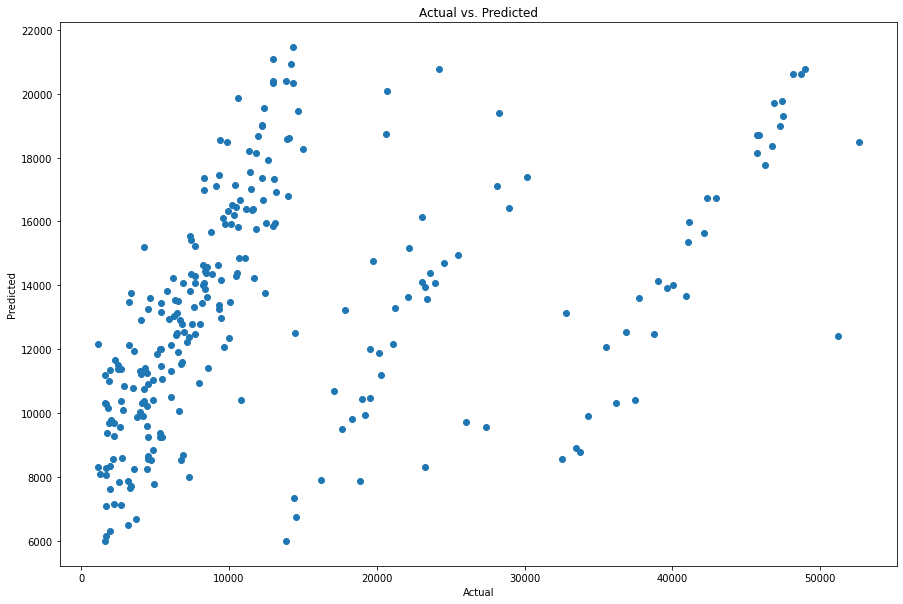

In [162]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
# plt.plot(Y_test, model.predict(Y_pred), color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

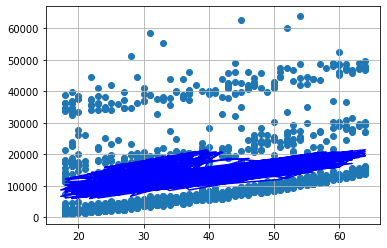

In [163]:
import matplotlib.pyplot as plt
plt.scatter(x=df['age'],y=df['charges'])
plt.plot(x_test, model.predict(x_test), color='blue')
plt.grid(True)
plt.show()

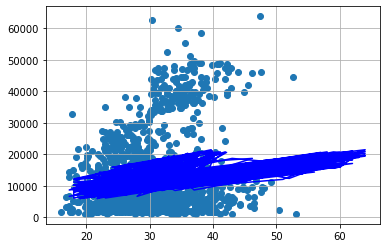

In [164]:
import matplotlib.pyplot as plt
plt.scatter(x=df['bmi'],y=df['charges'])
plt.plot(x_test, model.predict(x_test), color='blue')
plt.grid(True)
plt.show()

# 3- Decision Tree Classifier

In [165]:
# import libraries
import pandas as pd
import numpy as np
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [166]:
df['sex']=df['sex'].replace("male", 1)
df['sex']=df['sex'].replace("female", 0)
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,1,30.97,3,no,northwest,10600.5483
1334,18,0,31.92,0,no,northeast,2205.9808
1335,18,0,36.85,0,no,southeast,1629.8335
1336,21,0,25.80,0,no,southwest,2007.9450
1337,61,0,29.07,0,yes,northwest,29141.3603


In [167]:
# selection of input and output
X=df[['age','bmi','sex']]
y=df['region']

In [168]:
X.head()

,age,bmi,sex
0,19,27.900,0
1,18,33.770,1
2,28,33.000,1
3,33,22.705,1
4,32,28.880,1


In [169]:
y.head()

0    southwest
1    southeast
2    southeast
3    northwest
4    northwest
Name: region, dtype: object

In [170]:
# machine learning algorithm
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier().fit(X,y)

# Prediction
model.predict([[50,30.97,1]])

C:\Users\alias\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['northwest'], dtype=object)

In [171]:
# Accuracy
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/5, random_state=0)
# create model
model=DecisionTreeClassifier()
# fitting modling
model.fit(X_train, y_train)
predicted_values=model.predict(X_test)
predicted_values

array(['northwest', 'northwest', 'northwest', 'northeast', 'northeast',
       'northwest', 'southeast', 'northwest', 'southwest', 'northeast',
       'northeast', 'southeast', 'southeast', 'northwest', 'northeast',
       'northeast', 'northeast', 'northeast', 'northwest', 'northeast',
       'northwest', 'southeast', 'southwest', 'northwest', 'northwest',
       'northwest', 'northwest', 'northwest', 'southwest', 'northwest',
       'northwest', 'southeast', 'southwest', 'southwest', 'southwest',
       'southeast', 'northeast', 'southwest', 'northwest', 'southeast',
       'southeast', 'northeast', 'northwest', 'northwest', 'northeast',
       'northwest', 'northwest', 'northwest', 'northeast', 'northwest',
       'northwest', 'southwest', 'northwest', 'northwest', 'southwest',
       'southwest', 'southwest', 'northeast', 'northwest', 'northeast',
       'southwest', 'southwest', 'southeast', 'northeast', 'southwest',
       'southeast', 'southwest', 'southwest', 'northeast', 'nort

In [172]:
# checking score
score=accuracy_score(y_test,predicted_values)
score

0.2798507462686567

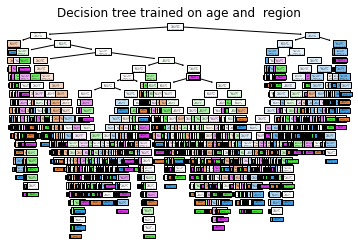

In [173]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

model=DecisionTreeClassifier().fit(X,y)
plot_tree(model,filled=True)
plt.title("Decision tree trained on age and  region")
plt.show()


# 4- K-Nearest Neibhour

In [174]:
# import libraries
import pandas as pd
import numpy as np
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [175]:
df['sex']=df['sex'].replace("male", 1)
df['sex']=df['sex'].replace("female", 0)
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,1,30.97,3,no,northwest,10600.5483
1334,18,0,31.92,0,no,northeast,2205.9808
1335,18,0,36.85,0,no,southeast,1629.8335
1336,21,0,25.80,0,no,southwest,2007.9450
1337,61,0,29.07,0,yes,northwest,29141.3603


In [176]:
# selection of input and output
X=df[['age','bmi','sex']]
y=df['region']

In [177]:
X.head()

,age,bmi,sex
0,19,27.900,0
1,18,33.770,1
2,28,33.000,1
3,33,22.705,1
4,32,28.880,1


In [178]:
y.head

<bound method NDFrame.head of 0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object>

In [179]:
# machine learning algorithm
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5).fit(X,y)

# Prediction
predicted=model.predict([[50,30.97,1]])
predicted

C:\Users\alias\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['northeast'], dtype=object)

In [180]:
model.predict(X)

array(['southwest', 'southeast', 'southeast', ..., 'southeast',
       'southwest', 'northwest'], dtype=object)

In [181]:
# metrices foe evoluation
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/5)
# create model
model=KNeighborsClassifier(n_neighbors=5)
# fitting modling
model.fit(X_train, y_train)
predicted_values=model.predict(X_test)
predicted_values

# checking score
score=accuracy_score(y_test,predicted_values)
print("The accuracy score for our model is =",score)

The accuracy score for our model is = 0.27611940298507465


In [182]:
# checking score
score=accuracy_score(y_test,predicted_values)
score

0.27611940298507465

1. **Accuracy score**

In [186]:
# how to check the accuracy of model
## for that purpose we need to split the data into test and train
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size =0.2)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
predicted_values = model.predict(X_test)
predicted_values
score = accuracy_score(y_test, predicted_values,
 )
score

0.26492537313432835

**2.** F1-score

In [187]:
# how to check the accuracy of model
## for that purpose we need to split the data into test and train
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size =0.2)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
predicted_values = model.predict(X_test)
predicted_values
score = f1_score(y_test, predicted_values,
 pos_label='positive',
 average='micro')
score

C:\Users\alias\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


0.27611940298507465

3. **Recall score**

In [184]:
#how to check the accuracy of model
## for that purpose we need to split the data into test and train
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size =0.2)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
predicted_values = model.predict(X_test)
predicted_values
score = recall_score(y_test, predicted_values,
 pos_label='positive',
 average='micro')
score

C:\Users\alias\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


0.26119402985074625

4. **Precision score**

In [185]:
# how to check the accuracy of model
## for that purpose we need to split the data into test and train
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size =0.2)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
predicted_values = model.predict(X_test)
predicted_values
score = precision_score(y_test, predicted_values,
 pos_label='positive',
 average='micro')
score

C:\Users\alias\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


0.27238805970149255